In [2]:
# import library pandas, yaitu library untuk manipulasi dan analisis data
import pandas as pd

# baca semua data di file csv dan jadikan dataframe lalu tampilkan
dataset = pd.read_csv('Library_Usage.csv')
dataset

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District,Unnamed: 15
0,3,SENIOR,28,13,65 to 74 years,X,Main Library,November,2012,z,email,True,2003,True,NaN,NaN
1,0,ADULT,21,10,55 to 59 years,X,Main Library,October,2015,z,email,True,2003,False,NaN,NaN
2,0,ADULT,275,559,60 to 64 years,X,Main Library,January,2015,z,email,True,2003,True,NaN,NaN
3,0,ADULT,73,38,45 to 54 years,M8,Mission Bay,February,2016,z,email,True,2003,False,NaN,NaN
4,0,ADULT,182,90,45 to 54 years,X,Main Library,July,2016,z,email,True,2003,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423443,0,ADULT,170,12,45 to 54 years,X,Main Library,August,2014,z,email,True,2008,False,6.0,NaN
423444,1,JUVENILE,4,0,10 to 19 years,X,Main Library,March,2015,z,email,True,2014,False,8.0,NaN
423445,0,ADULT,4,1,25 to 34 years,X,Main Library,January,2014,z,email,True,2011,False,NaN,NaN
423446,0,ADULT,30,4,20 to 24 years,O7,Ortega,July,2016,z,email,True,2005,False,4.0,NaN


In [3]:
# 1. Laporan Persebaran Cabang Perpustakaan Tempat Anggota Mendaftar
# temukan cabang - cabang perpustakaan dan hitung banyak kemunculannya
library_branch_registration = dataset['Home Library Definition'].value_counts().reset_index()
# ubah nama kolom lalu tampilkan laporan
library_branch_registration.columns = ['library_branch', 'count']
library_branch_registration

,library_branch,count
0,Main Library,124814
1,Mission,25443
2,Richmond,22475
3,Chinatown,17140
4,Excelsior,16706
5,Sunset,15020
6,Ortega,14456
7,West Portal,13338
8,Mission Bay,11271
9,Ingleside,10738


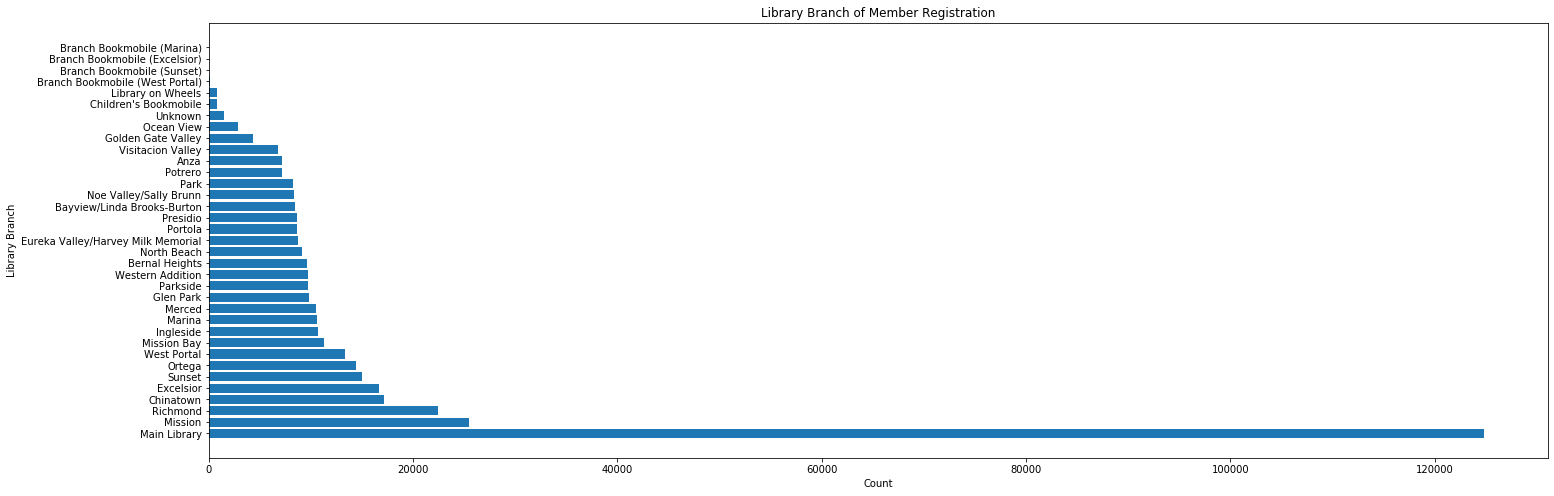

In [5]:
# visualisasi laporan 1
# import library untuk visualisasi data
import matplotlib.pyplot as plt

# menentukan ukuran visualisasi (panjang=24, lebar=8)
plt.figure(figsize=(24,8))
# visualisasi bar chart horizontal dengan sumbu x=cabang perpustakaan, y=banyak pendaftaran
plt.barh(library_branch_registration['library_branch'], library_branch_registration['count'])
# memberi judul visualisasi
plt.title("Library Branch of Member Registration")
# memberi judul label sumbu x dan y
plt.ylabel('Library Branch')
plt.xlabel('Count')
# simpan visualisasi lalu tampilkan
plt.savefig('report_1.png')
plt.show()

In [6]:
# 2. Laporan Banyaknya Pendaftaran Anggota Perpustakaan Tiap Tahun
year_registered = dataset['Year Patron Registered'].value_counts().reset_index()
year_registered.columns = ['year_registered', 'count']
year_registered = year_registered.sort_values('year_registered').reset_index().drop('index', 1)
year_registered

,year_registered,count
0,2003,69257
1,2004,8994
2,2005,9668
3,2006,10776
4,2007,13289
5,2008,20518
6,2009,22307
7,2010,24321
8,2011,26531
9,2012,37395


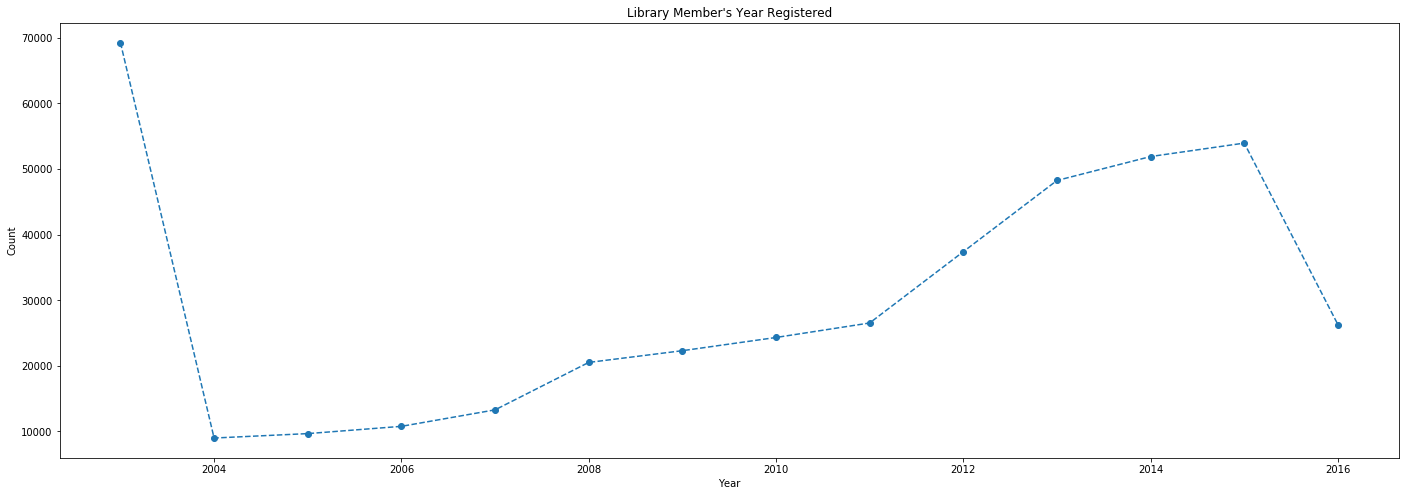

In [7]:
# visualisasi laporan 2 dengan plot chart
plt.figure(figsize=(24,8))
# visualisasi plot chart dengan sumbu x=tahun regis, y=banyak pendaftaran, dengan garis putus - putus dan marker bulat
plt.plot(year_registered['year_registered'], year_registered['count'], linestyle='--', marker='o')
plt.title("Library Member's Year Registered")
plt.xlabel('Year')
plt.ylabel('Count')
plt.savefig('report_2.png')
plt.show()

In [8]:
# 3. Laporan Rata – Rata Banyaknya Perpanjangan Peminjaman Buku Berdasarkan Tipe Keanggotaan
# kelompokkan data berdasarkan tipe keanggotaan lalu cari rata - rata total pembaruan / perpanjangan peminjaman buku tiap tipe keanggotaan
avg_renewals_by_pt = dataset.groupby(['Patron Type Definition'])['Total Renewals'].mean().reset_index()
avg_renewals_by_pt

,Patron Type Definition,Total Renewals
0,ADULT,60.814344
1,AT USER ADULT,53.610315
2,AT USER JUVENILE,42.148936
3,AT USER SENIOR,104.303030
4,AT USER TEEN,33.840909
5,AT USER WELCOME,13.288889
6,BOOKS BY MAIL,138.326316
7,DIGITAL ACCESS CARD,0.453555
8,FRIENDS FOR LIFE,204.550000
9,JUVENILE,43.084634


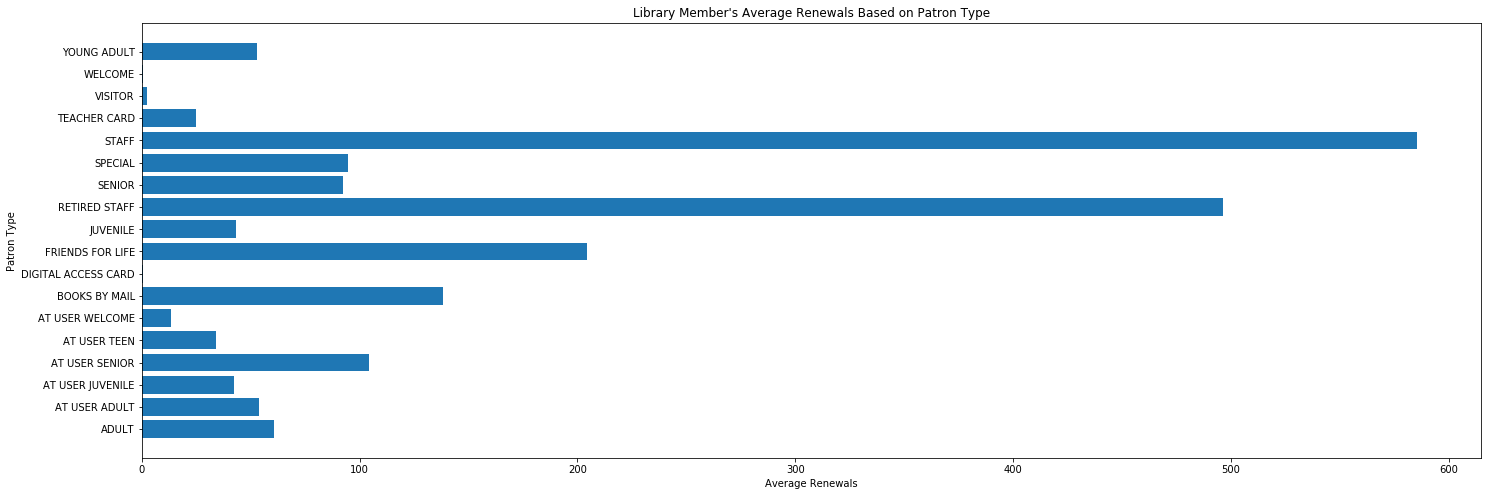

In [11]:
# visualisasi laporan 3
plt.figure(figsize=(24,8))
plt.barh(avg_renewals_by_pt['Patron Type Definition'], avg_renewals_by_pt['Total Renewals'])
plt.title("Library Member's Average Renewals Based on Patron Type")
plt.ylabel('Patron Type')
plt.xlabel('Average Renewals')
plt.savefig('report_3.png')
plt.show()